<a href="https://colab.research.google.com/github/PierreCabot/PierreCODER/blob/main/ProyectoDS_Parte1_PierreCabot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hola Phyton')

hola Phyton


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



 El siguiente dataset fue obtenido de la dirección https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Tiene como por título en inglés "Stroke Prediction Dataset"

  Contexto:

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte a nivel mundial y es responsable de aproximadamente el 11% del total de muertes.

Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.



DATOS

1) ID: identificador único

2) Gender: "Masculino", "Femenino" u "Otro"

3) Age: edad del paciente

4) Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5) Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) Ever_married: "No" o "Sí"

7) Work_type: "niños", "Govt_jov", "Never_worked", "Privado" o "Autónomo"

8) Residence_type: "Rural" o "Urbana"

9) Avg_glucose_level: nivel promedio de glucosa en sangre

10) BMI: índice de masa corporal

11) Smoke_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*

12) Stroke: 1 si el paciente tuvo un ictus o 0 si no

Hipótesis

Factores de riesgo como el fumar o haber fumado durante los años de vida aumenta la probabilidad de tener un ictus. La población femenina tiene una mayor tendencia a sufrir tal accidente.

[texto del enlace](https://)

In [4]:
url = 'https://github.com/PierreCabot/PierreCODER/raw/main/healthcare-dataset-stroke-data.csv'
df =pd.read_csv(url)
#Se sube el dataset desde github

In [5]:
df.shape

(5110, 12)

In [ ]:
#El dataset posee 5110 registros con 12 columnas

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Se consulta cuales son cada una de estas columnas

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Se puede observar al investigar las caracteristicas de los datos, de que en la columna "bmi" hay menos datos que los registros totales, esto no esta dando un indicio de la faltante de datos

# hay valores faltantes en la columna BMI

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Se hace un análisis estadístico por variables, sin embargo, está incluyendo algunas, que deberían de ser categoricas. Se procede a definirlas como tal

In [10]:
df['id'] = df['id'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['heart_disease'] = df['heart_disease'].astype('category')
df['stroke']=df['stroke'].astype('category')
df['gender']=df['gender'].astype('category')
df.describe(include='category')

,id,gender,hypertension,heart_disease,stroke
count,5110,5110,5110,5110,5110
unique,5110,3,2,2,2
top,67,Female,0,0,0
freq,1,2994,4612,4834,4861


In [11]:
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [12]:
df.smoking_status.value_counts()



smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [13]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [14]:
df.isna().sum().sort_values(ascending = False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

# 201 valores de  BMI sin registro

In [15]:
IMC= df["bmi"]
IMC

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

Se definió una variable IMC, como lo dicen sus siglas en español, índice de masa corporal, con el fin de sustituir los registros faltantes

In [16]:
# Calculo el coeficiente de variación de la columna "BMI"
cv = (IMC.std() / IMC.mean()) * 100

print("Coeficiente de variación de 'BMI':", int(cv))

Coeficiente de variación de 'BMI': 27


In [17]:
IMC= IMC.fillna(IMC.median())

In [18]:
df = df.drop('bmi', axis = 1) #elimino la columna Age del df original que contienen valores faltantes.
data_frame_final=pd.concat([df,IMC], axis=1) #construyo un nuevo df con los valores de Age sin datos faltantes mediante la función pd.concat
data_frame_final

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6


In [19]:
data_frame_final.isnull().sum().sort_values(ascending = False)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
bmi                  0
dtype: int64

Los valores faltantes ahora son 0

In [20]:
data_frame_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   category
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   smoking_status     5110 non-null   object  
 10  stroke             5110 non-null   category
 11  bmi                5110 non-null   float64 
dtypes: category(5), float64(3), object(4)
memory usage: 479.0+ KB


Se comienza a graficar y empezar a averiguar si existe alguna dependencia.

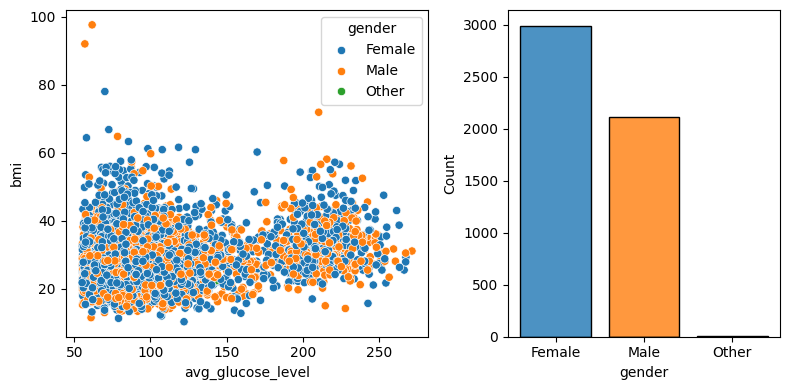

In [21]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data= data_frame_final, x="avg_glucose_level", y="bmi", hue="gender", ax=axs[0])
sns.histplot(data= data_frame_final, x="gender", hue="gender", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

No existe a simple vista, o no hay suficiente evidencia en los datos para establecer una relación entre IBM y avg_glucose level.

In [53]:
bmi= data_frame_final["bmi"]

<Axes: >

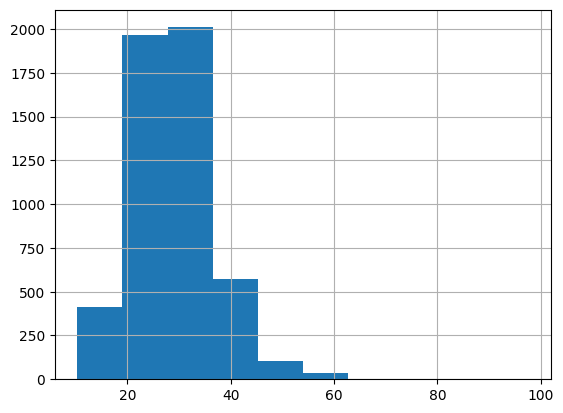

In [23]:
bmi.hist()

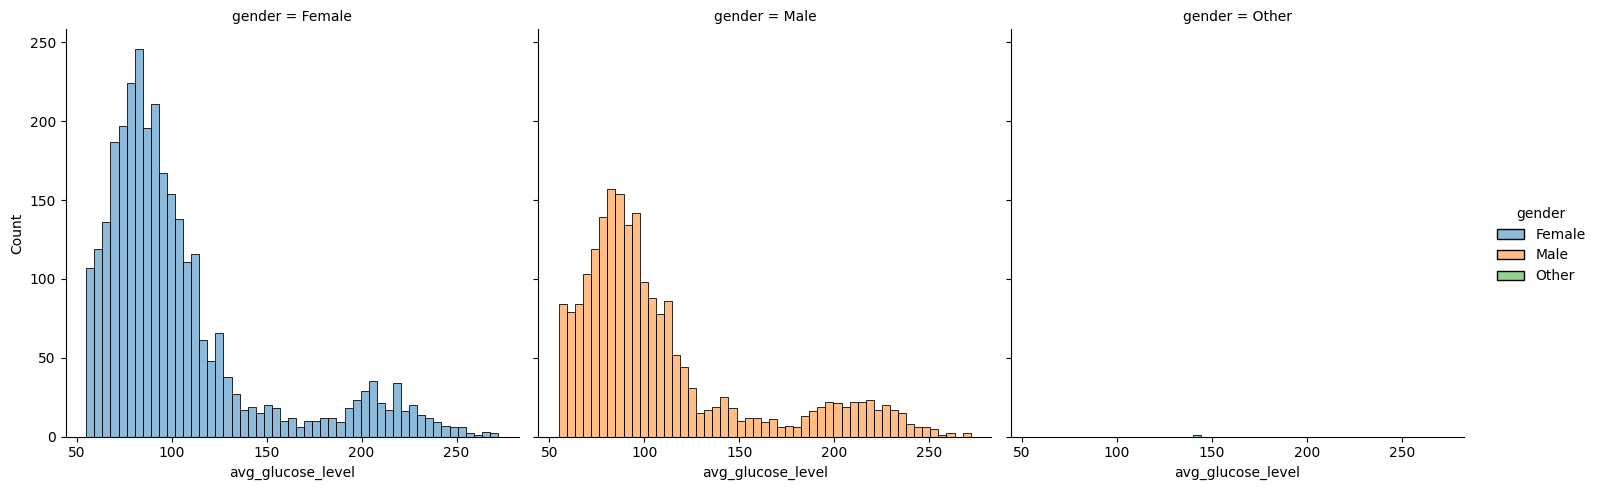

In [24]:
sns.displot(data=data_frame_final, x="avg_glucose_level", hue="gender", col="gender")

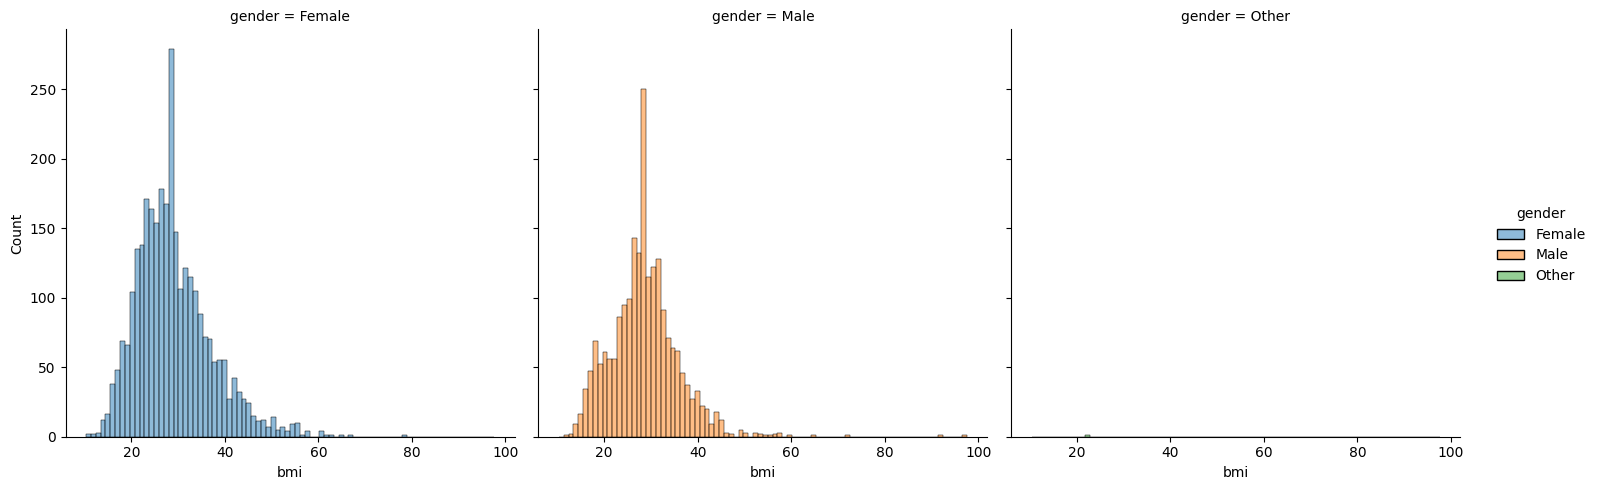

In [25]:
sns.displot(data=data_frame_final, x="bmi", hue="gender", col="gender")

Se grafica la distribución del nivel de glucosa y el indice de masa corporal tanto para hombres como mujeres.

<ipython-input-26-a43cf2dba771>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "smoking_status", y = "stroke", hue = "gender", ci=None, data = data_frame_final, palette= "mako", estimator=np.sum)


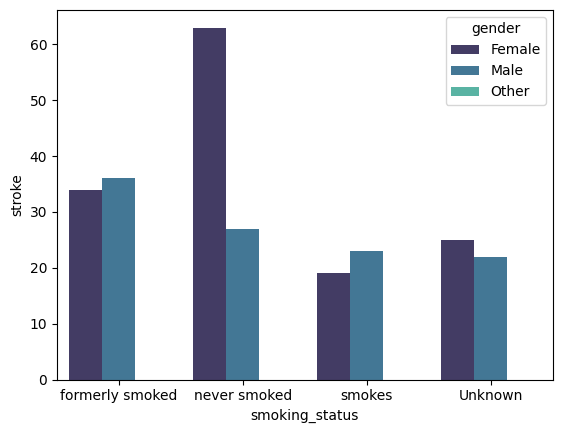

In [26]:
data_frame_final["stroke"]= data_frame_final["stroke"].astype(int)

sns.barplot(x = "smoking_status", y = "stroke", hue = "gender", ci=None, data = data_frame_final, palette= "mako", estimator=np.sum)
plt.show()

<ipython-input-27-eddac138beba>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "hypertension", y = "stroke", hue = "gender", ci=None, data = data_frame_final, palette= "mako", estimator=np.sum)


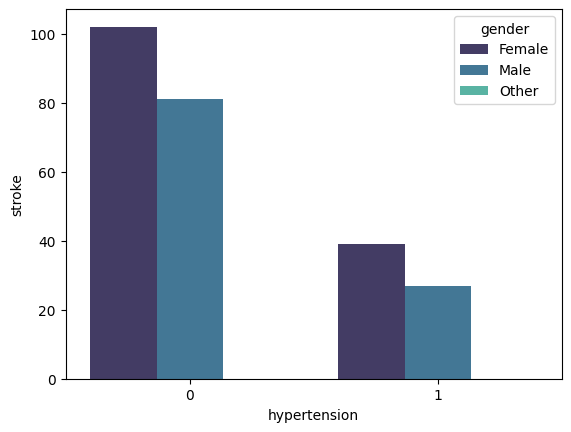

In [27]:
sns.barplot(x = "hypertension", y = "stroke", hue = "gender", ci=None, data = data_frame_final, palette= "mako", estimator=np.sum)
plt.show()

<ipython-input-28-7a63497299d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= data_frame_final, x="smoking_status", y="stroke", hue="gender", ax=axs[0,0], ci=None, palette= "mako", estimator=np.sum)
<ipython-input-28-7a63497299d0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= data_frame_final, x="hypertension", y="stroke", hue="gender", ax=axs[0,1], ci=None, palette= "mako", estimator=np.sum)
<ipython-input-28-7a63497299d0>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= data_frame_final, x="ever_married", y="stroke", hue="gender", ax=axs[1,0], ci=None, palette= "mako", estimator=np.sum)
<ipython-input-28-7a63497299d0>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= data_frame_final, x="heart_disease", y="stroke", 

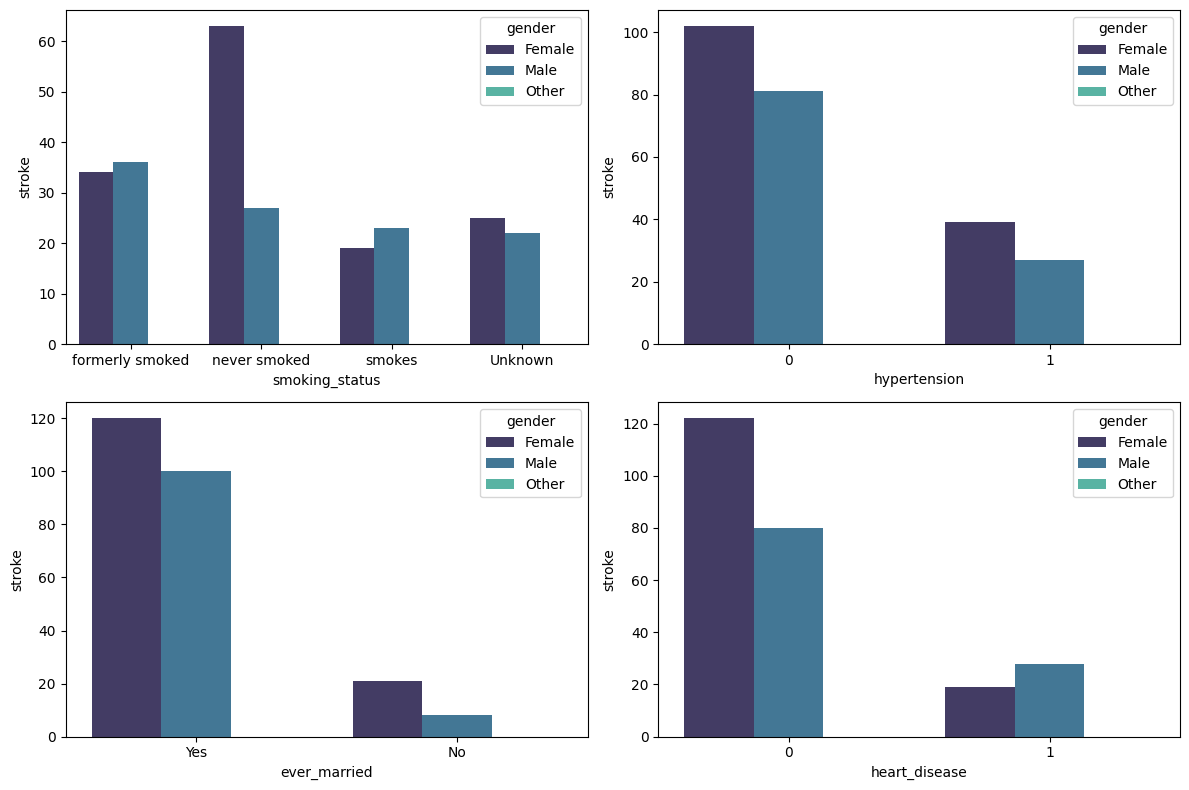

In [28]:
data_frame_final["stroke"]= data_frame_final["stroke"].astype(int)
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.barplot(data= data_frame_final, x="smoking_status", y="stroke", hue="gender", ax=axs[0,0], ci=None, palette= "mako", estimator=np.sum)
sns.barplot(data= data_frame_final, x="hypertension", y="stroke", hue="gender", ax=axs[0,1], ci=None, palette= "mako", estimator=np.sum)
sns.barplot(data= data_frame_final, x="ever_married", y="stroke", hue="gender", ax=axs[1,0], ci=None, palette= "mako", estimator=np.sum)
sns.barplot(data= data_frame_final, x="heart_disease", y="stroke", hue="gender", ax=axs[1,1], ci=None, palette= "mako", estimator=np.sum)
f.tight_layout()

Son varias las conclusiones que se pueden sacar a partir de estos cuatro gráficos de barras. De manera general, la frecuencia de ictus es mayor en las mujeres en todos los casos. Predomina esta tendencia en los datos para las mujeres que nunca fumaron y no tienen hipertensión. Se muestra lo mismo para aquellas que alguna vez estuvieron casadas y tienen alguna enfermedad cardíaca.
La frecuencia de ictus en los hombres es visiblemente menor que en las mujeres.
Se da que en aquellos hombres que son ex-fumadores, mayor tendencia a sufrir un ACV a aquellos que nunca fumaron.

In [29]:
women = data_frame_final[data_frame_final['gender']=='Female']
men = data_frame_final[data_frame_final['gender']=='Male']

print("Cantidad de mujeres", len(women))
print("Cantidad de hombres", len(men))


Cantidad de mujeres 2994
Cantidad de hombres 2115


Se calcula tanto la cantidad de mujeres como de hombres en el registro con el fin de analizar más profundamente los datos.

Text(0.5, 1.0, 'Hombres')

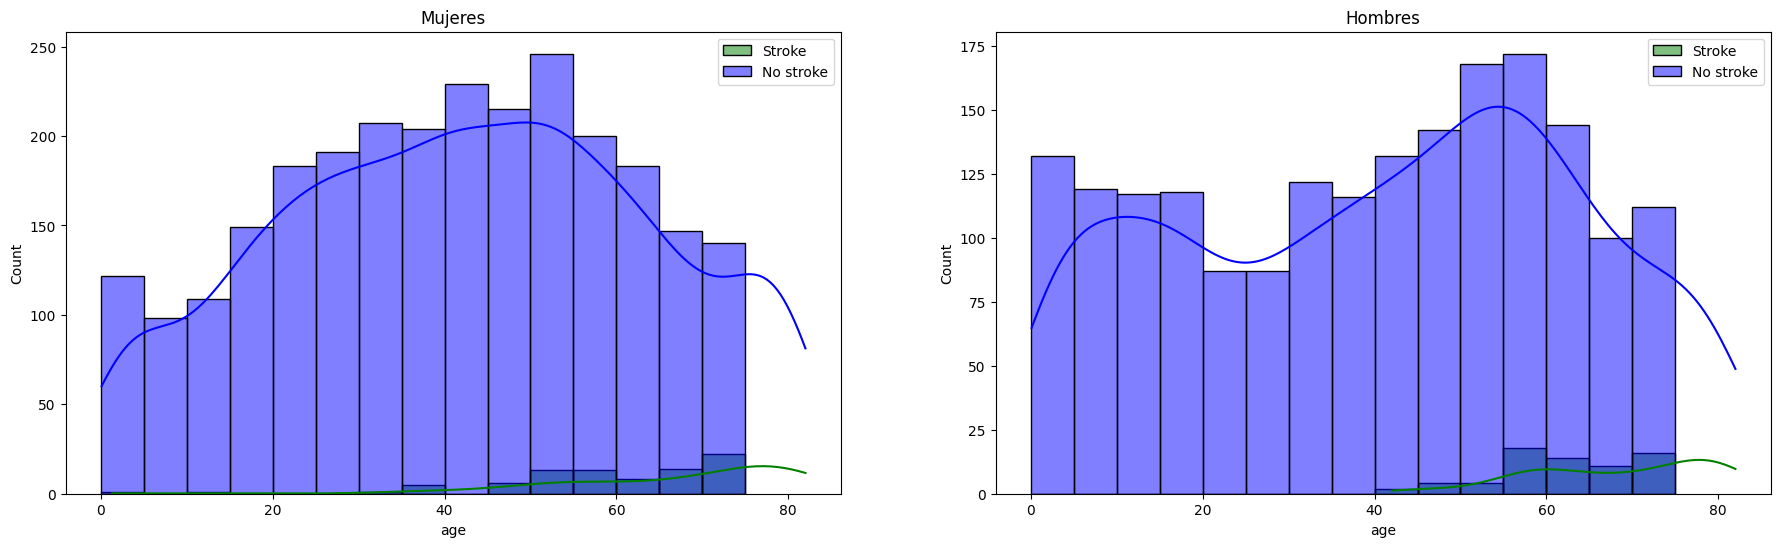

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22, 6))
ax = sns.histplot(women[women['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke", color='g', ax = axes[0], kde =True)
ax = sns.histplot(women[women['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke", color='b', ax = axes[0], kde = True)
ax.legend()
ax.set_title('Mujeres')

ax = sns.histplot(men[men['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke",  color='g',ax = axes[1], kde = True)
ax = sns.histplot(men[men['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke",  color='b',ax = axes[1], kde = True)
ax.legend()
ax.set_title('Hombres')

En estos dos histogramas se puede observar que aquellos que sufrieron un accidente son mayores de 40 años, esto tanto para los hombres como para las mujeres

In [45]:
cantidad_de_edad_nula = data_frame_final[data_frame_final['age']==0]
print("Cantidad de datos con edad 0",len(cantidad_de_edad_nula))

Cantidad de datos con edad 0 0


In [47]:
Cantidaddemujeresconictus= data_frame_final[ (data_frame_final['stroke']==1) & (data_frame_final['gender']=='Female')]
print( "Cantidad de mujeres con ictus" , len(Cantidaddemujeresconictus))

Cantidad de mujeres con ictus 141


In [48]:
Cantidaddehombresconictus= data_frame_final[ (data_frame_final['stroke']==1) & (data_frame_final['gender']=='Male')]
print( "Cantidad de hombres con ictus" , len(Cantidaddehombresconictus))

Cantidad de hombres con ictus 108


In [52]:
Cantidaddehombres = data_frame_final[data_frame_final['gender']=='Male']
Cantidaddemujeres = data_frame_final[data_frame_final['gender']=='Female']
Porcentajedehombresconictus= (len(Cantidaddehombresconictus)/len(Cantidaddehombres))*100
Porcentajedemujeresconictus= (len(Cantidaddemujeresconictus)/len(Cantidaddemujeres))*100
print("Cantidad de hombres",len(Cantidaddehombres))
print("Cantidad de mujeres",len(Cantidaddemujeres))
print("Porcentaje de hombres con ictus",int(Porcentajedehombresconictus))
print("Porcentaje de mujeres con ictus",int(Porcentajedemujeresconictus))

Cantidad de hombres 2115
Cantidad de mujeres 2994
Porcentaje de hombres con ictus 5
Porcentaje de mujeres con ictus 4


El porcentaje de hombres y mujeres registrados con ictus son similares.

Sin embargo, es necesario filtrar aquellas personas que por ejemplo son mayores de 40 años, ya que por los gráficos anteriores, se puede inferir que los accidentes de este tipo se da a partir de esa edad.